In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
path = "C:/Users/LG/Desktop/taeung "
os.chdir(path)

df = pd.read_csv("melting_tank.csv", encoding="cp949")

In [ ]:
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [ ]:
df.describe()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,835200.000000,835200.000000,835200.000000,835200.000000,835200.000000
mean,417599.500000,509.200623,459.782865,582.962125,3.194853
std,241101.616752,128.277519,639.436413,1217.604433,0.011822
min,0.000000,308.000000,0.000000,0.000000,3.170000
25%,208799.750000,430.000000,119.000000,186.000000,3.190000
50%,417599.500000,469.000000,168.000000,383.000000,3.190000
75%,626399.250000,502.000000,218.000000,583.000000,3.200000
max,835199.000000,832.000000,1804.000000,55252.000000,3.230000


In [ ]:
df['STD_DT']=df['STD_DT'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d %H:%M:%S'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB


In [ ]:
df = df.set_index(['STD_DT'])

In [ ]:
df.head(20)

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,OK
2020-03-04 00:00:00,1,433,78,609,3.19,OK
2020-03-04 00:00:00,2,464,154,608,3.19,OK
2020-03-04 00:00:00,3,379,212,606,3.19,OK
2020-03-04 00:00:00,4,798,1736,604,3.21,OK
2020-03-04 00:00:00,5,743,1722,603,3.21,OK
2020-03-04 00:00:00,6,390,212,602,3.19,OK
2020-03-04 00:00:00,7,493,152,600,3.19,OK
2020-03-04 00:00:00,8,427,0,599,3.19,OK


In [ ]:
col_name = ['MELT_TEMP','MOTORSPEED','MELT_WEIGHT','INSP','TAG']

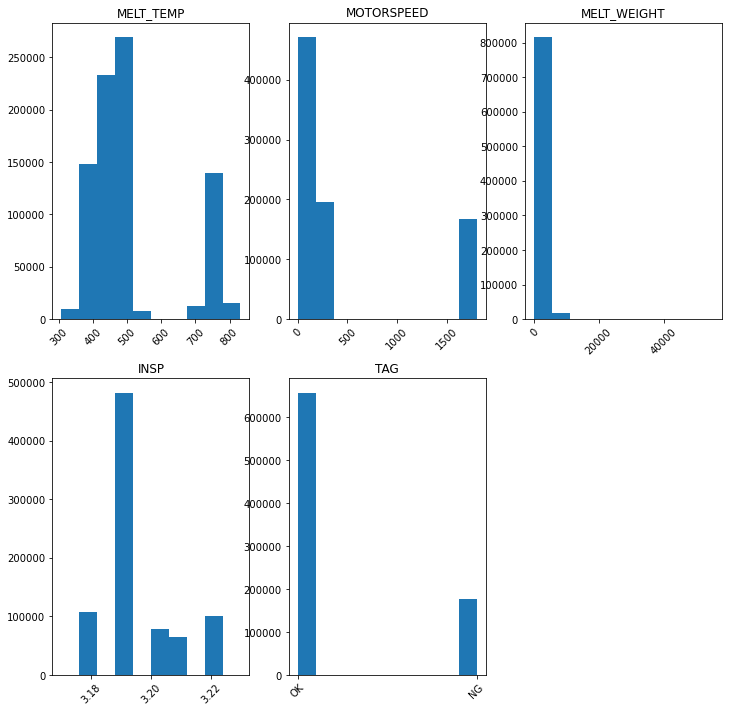

In [ ]:
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
    num = 231+i
    plt.subplot(num)
    plt.hist(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.show()

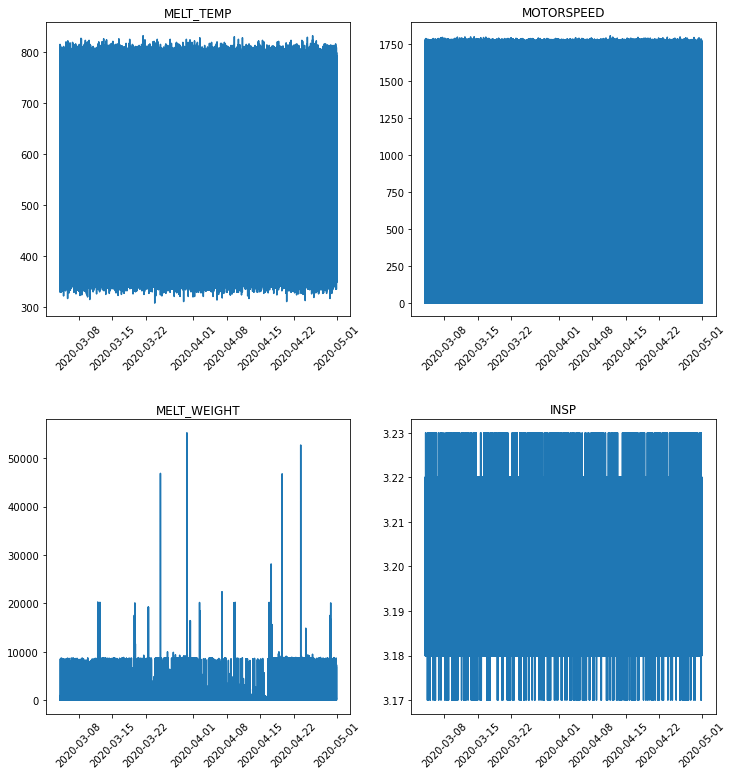

In [ ]:
col_name = ['MELT_TEMP','MOTORSPEED','MELT_WEIGHT','INSP']
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
    num = 221+i
    plt.subplot(num)
    plt.plot(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

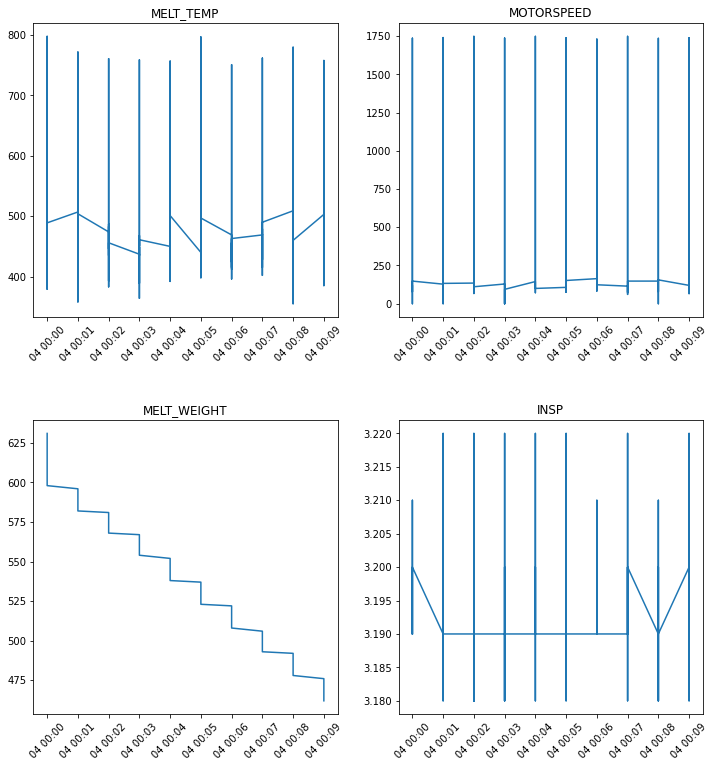

In [ ]:
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
    num = 221+i
    plt.subplot(num)
    plt.plot(df[col_name[i]][0:100])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

In [ ]:
encoder = preprocessing.LabelEncoder()
df['TAG']=encoder.fit_transform(df['TAG'])
df['TAG']=df['TAG'].astype('float32')

In [ ]:
df['TAG'].value_counts()

1.0    658133
0.0    177067
Name: TAG, dtype: int64

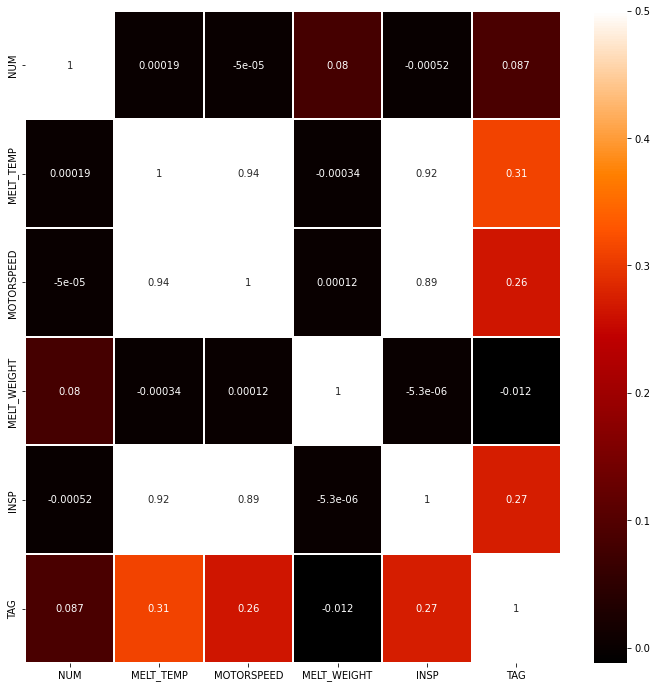

In [ ]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show()

In [ ]:
corr = df.corr(method = 'pearson')
corr

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524,0.086698
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295,0.310586
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813,0.264693
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005,-0.012084
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000,0.272580
TAG,0.086698,0.310586,0.264693,-0.012084,0.272580,1.000000


In [ ]:
df1= df[['MELT_TEMP', 'MOTORSPEED', 'INSP', 'TAG']]

In [ ]:
df1

,MELT_TEMP,MOTORSPEED,INSP,TAG
STD_DT,,,,
2020-03-04 00:00:00,489,116,3.19,1.0
2020-03-04 00:00:00,433,78,3.19,1.0
2020-03-04 00:00:00,464,154,3.19,1.0
2020-03-04 00:00:00,379,212,3.19,1.0
2020-03-04 00:00:00,798,1736,3.21,1.0
...,...,...,...,...
2020-04-30 23:59:00,755,1743,3.21,1.0
2020-04-30 23:59:00,385,206,3.19,1.0
2020-04-30 23:59:00,465,148,3.20,1.0


In [ ]:
split_date = int(df1.shape[0]*0.7)

train = df1[:split_date]
test = df1[split_date:]

In [ ]:
print(train.shape)
print(test.shape)

(584640, 4)
(250560, 4)


In [ ]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [ ]:
train_sc

array([[0.34541985, 0.06430155, 0.33333333, 1.        ],
       [0.23854962, 0.04323725, 0.33333333, 1.        ],
       [0.29770992, 0.08536585, 0.33333333, 1.        ],
       ...,
       [0.31679389, 0.08203991, 0.33333333, 1.        ],
       [0.1870229 , 0.03769401, 0.16666667, 1.        ],
       [0.32251908, 0.05820399, 0.33333333, 1.        ]])

In [ ]:
X_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [ ]:
smote = SMOTE(random_state=0)

X_train_over,y_train_over = smote.fit_sample(X_train_values,y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 헤이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (584640, 3) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (821032, 3) (821032,)
SMOTE 적용 후 헤이블 값 분포: 
 1.0    410516
0.0    410516
dtype: int64


In [ ]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
X_train_over = pd.DataFrame(X_train_over, columns=['MELT_TEMP', 'MOTORSPEED', 'INST'])
y_train_over = pd.DataFrame(y_train_over, columns=['TAG'])

In [ ]:
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [ ]:
test_sc = pd.DataFrame(test_sc, columns=['MELT_TEMP', 'MOTORSPEED','INST', 'TAG'])

In [ ]:
featur_cols = ['MELT_TEMP', 'MOTORSPEED', 'INST']
label_cols = ['TAG']

In [ ]:
test_feature = test_sc[featur_cols]
test_label = test_sc[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 3), (250550, 1))

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.3)

x_train.shape, x_valid.shape

((574715, 10, 3), (246307, 10, 3))

In [ ]:
model = Sequential()
model.add(LSTM(50,
              input_shape=(train_feature.shape[1], train_feature.shape[2]),
              activation='tanh',
              return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model_path = path

In [ ]:
from keras.optimizers import Adam
compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0003), metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

In [ ]:
history = model.fit(x_train, y_train,epochs=100,batch_size=50,validation_data=(x_valid, y_valid),callbacks=[early_stop, checkpoint])

Epoch 1/100
11495/11495 [==============================] - 169s 14ms/step - loss: 0.3815 - accuracy: 0.7870 - val_loss: 0.3508 - val_accuracy: 0.7962
Epoch 2/100
11495/11495 [==============================] - 165s 14ms/step - loss: 0.3478 - accuracy: 0.8036 - val_loss: 0.3481 - val_accuracy: 0.8035
Epoch 3/100
11495/11495 [==============================] - 169s 15ms/step - loss: 0.3468 - accuracy: 0.8044 - val_loss: 0.3471 - val_accuracy: 0.8040
Epoch 4/100
11495/11495 [==============================] - 170s 15ms/step - loss: 0.3465 - accuracy: 0.8046 - val_loss: 0.3467 - val_accuracy: 0.8044
Epoch 5/100
11495/11495 [==============================] - 171s 15ms/step - loss: 0.3462 - accuracy: 0.8048 - val_loss: 0.3469 - val_accuracy: 0.8029
Epoch 6/100
11495/11495 [==============================] - 173s 15ms/step - loss: 0.3461 - accuracy: 0.8045 - val_loss: 0.3473 - val_accuracy: 0.8023
Epoch 7/100
11495/11495 [==============================] - 174s 15ms/step - loss: 0.3460 - accuracy:

In [ ]:
model.load_weights(filename)
pred=model.predict(test_feature)

7830/7830 [==============================] - 12s 1ms/step


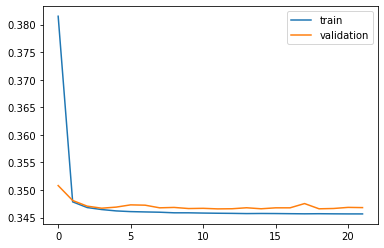

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

In [ ]:
pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
pred_df['TAG'].value_counts()

1    200432
0     50118
Name: TAG, dtype: int64

In [ ]:
classify=confusion_matrix(test_label, pred_df)
print(classify)

[[  2155    785]
 [ 47963 199647]]


In [ ]:
p = precision_score(test_label, pred_df)
print("predcision: %0.4f" %p)
r = recall_score(test_label, pred_df)
print("recall: %0.4f" %r)
f1 = f1_score(test_label, pred_df)
print("f1-score: %0.4f" %p)
acc = accuracy_score(test_label, pred_df)
print("predcision: %0.4f" %acc)

predcision: 0.9961
recall: 0.8063
f1-score: 0.9961
predcision: 0.8054
